## 卷积自编码器

In [35]:
% matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 导入数据

In [36]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/kevin/dataset/MNIST/', validation_size=0, one_hot=False)

Extracting /home/kevin/dataset/MNIST/train-images-idx3-ubyte.gz
Extracting /home/kevin/dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting /home/kevin/dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting /home/kevin/dataset/MNIST/t10k-labels-idx1-ubyte.gz


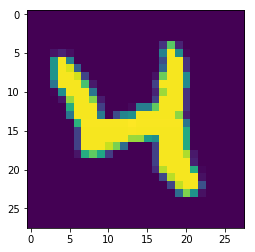

In [37]:
img = mnist.train.images[20]
plt.imshow(img.reshape([28, 28]))

## 输入

In [38]:
inputs_ = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name='inputs_')
targets_ = tf.placeholder(dtype=tf.float32, shape=[None ,28, 28, 1], name='targets_')

## Encoder
三层卷积

In [39]:
# conv1
conv1 = tf.layers.conv2d(inputs=inputs_, filters=64, kernel_size=(3,3), 
                         strides=(1,1), padding='same', activation=tf.nn.relu)
conv1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=(2,2), strides=(2,2), padding='same')

# conv2
conv2 = tf.layers.conv2d(inputs=conv1, filters=64, kernel_size=(3,3), 
                         strides=(1,1), padding='same', activation=tf.nn.relu)
conv2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=(2,2), strides=(2,2), padding='same')

# conv3
conv3 = tf.layers.conv2d(inputs=conv2, filters=64, kernel_size=(3,3),
                         strides=(1,1), padding='same', activation=tf.nn.relu)
conv3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=(2,2), strides=(2,2), padding='same')

## Decoder

In [40]:
conv4 = tf.image.resize_nearest_neighbor(images=conv3, size=(7,7))
conv4 = tf.layers.conv2d(inputs=conv4, filters=32, kernel_size=(3,3), 
                         strides=(1,1), padding='same', activation=tf.nn.relu)

conv5 = tf.image.resize_nearest_neighbor(images=conv3, size=(14,14))
conv5 = tf.layers.conv2d(inputs=conv5, filters=64, kernel_size=(3,3),
                         strides=(1,1), padding='same', activation=tf.nn.relu)

conv6 = tf.image.resize_nearest_neighbor(images=conv5, size=(28,28))
conv6 = tf.layers.conv2d(inputs=conv6, filters=64, kernel_size=(3,3),
                         strides=(1,1), padding='same', activation=tf.nn.relu)

## logits and ouputs

In [41]:
logits_ = tf.layers.conv2d(inputs=conv6, filters=1, kernel_size=(3,3), 
                           strides=(1,1), padding='same', activation=None)

outputs_ = tf.nn.sigmoid(logits_, name='outputs_')

## loss and optimizer

In [42]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_, labels=targets_)
cost = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

## 训练

In [43]:
sess = tf.InteractiveSession()

In [44]:
noise_factor = 0.5
epochs = 20
batch_size = 128
sess.run(tf.global_variables_initializer())

total_batch = mnist.train.num_examples // batch_size

for ep in range(epochs):
    for batch in range(total_batch):
        batch_xs, _ = mnist.train.next_batch(batch_size=batch_size)
        batch_xs = batch_xs.reshape((-1, 28, 28, 1))
        
        # 加入噪声
        noisy_imgs = batch_xs + noise_factor * np.random.randn(*batch_xs.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        batch_cost, _ = sess.run([cost, optimizer], 
                                 feed_dict={inputs_:noisy_imgs,
                                            targets_: batch_xs})
        
        print('Epoch: %s/%s; Batch:%s/%s; Training loss:%s'%(ep+1, epochs, batch+1, total_batch, batch_cost))

Epoch: 1/20; Batch:1/468; Training loss:0.686069
Epoch: 1/20; Batch:2/468; Training loss:0.614573
Epoch: 1/20; Batch:3/468; Training loss:0.524235
Epoch: 1/20; Batch:4/468; Training loss:0.487001
Epoch: 1/20; Batch:5/468; Training loss:0.528825
Epoch: 1/20; Batch:6/468; Training loss:0.475946
Epoch: 1/20; Batch:7/468; Training loss:0.462307
Epoch: 1/20; Batch:8/468; Training loss:0.457507
Epoch: 1/20; Batch:9/468; Training loss:0.441077
Epoch: 1/20; Batch:10/468; Training loss:0.423748
Epoch: 1/20; Batch:11/468; Training loss:0.425047
Epoch: 1/20; Batch:12/468; Training loss:0.404334
Epoch: 1/20; Batch:13/468; Training loss:0.38443
Epoch: 1/20; Batch:14/468; Training loss:0.373014
Epoch: 1/20; Batch:15/468; Training loss:0.358164
Epoch: 1/20; Batch:16/468; Training loss:0.346013
Epoch: 1/20; Batch:17/468; Training loss:0.32784
Epoch: 1/20; Batch:18/468; Training loss:0.303415
Epoch: 1/20; Batch:19/468; Training loss:0.296547
Epoch: 1/20; Batch:20/468; Training loss:0.291313
Epoch: 1/20

Epoch: 1/20; Batch:171/468; Training loss:0.178974
Epoch: 1/20; Batch:172/468; Training loss:0.186155
Epoch: 1/20; Batch:173/468; Training loss:0.181398
Epoch: 1/20; Batch:174/468; Training loss:0.173418
Epoch: 1/20; Batch:175/468; Training loss:0.169563
Epoch: 1/20; Batch:176/468; Training loss:0.180724
Epoch: 1/20; Batch:177/468; Training loss:0.186191
Epoch: 1/20; Batch:178/468; Training loss:0.178929
Epoch: 1/20; Batch:179/468; Training loss:0.177625
Epoch: 1/20; Batch:180/468; Training loss:0.194045
Epoch: 1/20; Batch:181/468; Training loss:0.181352
Epoch: 1/20; Batch:182/468; Training loss:0.173751
Epoch: 1/20; Batch:183/468; Training loss:0.177099
Epoch: 1/20; Batch:184/468; Training loss:0.178904
Epoch: 1/20; Batch:185/468; Training loss:0.185373
Epoch: 1/20; Batch:186/468; Training loss:0.179678
Epoch: 1/20; Batch:187/468; Training loss:0.178515
Epoch: 1/20; Batch:188/468; Training loss:0.177773
Epoch: 1/20; Batch:189/468; Training loss:0.180043
Epoch: 1/20; Batch:190/468; Tra

Epoch: 1/20; Batch:338/468; Training loss:0.153629
Epoch: 1/20; Batch:339/468; Training loss:0.148994
Epoch: 1/20; Batch:340/468; Training loss:0.145953
Epoch: 1/20; Batch:341/468; Training loss:0.14767
Epoch: 1/20; Batch:342/468; Training loss:0.150812
Epoch: 1/20; Batch:343/468; Training loss:0.149608
Epoch: 1/20; Batch:344/468; Training loss:0.150564
Epoch: 1/20; Batch:345/468; Training loss:0.152097
Epoch: 1/20; Batch:346/468; Training loss:0.149925
Epoch: 1/20; Batch:347/468; Training loss:0.145752
Epoch: 1/20; Batch:348/468; Training loss:0.142009
Epoch: 1/20; Batch:349/468; Training loss:0.151864
Epoch: 1/20; Batch:350/468; Training loss:0.152334
Epoch: 1/20; Batch:351/468; Training loss:0.145974
Epoch: 1/20; Batch:352/468; Training loss:0.148976
Epoch: 1/20; Batch:353/468; Training loss:0.150641
Epoch: 1/20; Batch:354/468; Training loss:0.14381
Epoch: 1/20; Batch:355/468; Training loss:0.148304
Epoch: 1/20; Batch:356/468; Training loss:0.154034
Epoch: 1/20; Batch:357/468; Train

Epoch: 2/20; Batch:37/468; Training loss:0.134569
Epoch: 2/20; Batch:38/468; Training loss:0.138183
Epoch: 2/20; Batch:39/468; Training loss:0.136536
Epoch: 2/20; Batch:40/468; Training loss:0.132428
Epoch: 2/20; Batch:41/468; Training loss:0.137055
Epoch: 2/20; Batch:42/468; Training loss:0.137986
Epoch: 2/20; Batch:43/468; Training loss:0.135534
Epoch: 2/20; Batch:44/468; Training loss:0.132098
Epoch: 2/20; Batch:45/468; Training loss:0.136631
Epoch: 2/20; Batch:46/468; Training loss:0.134927
Epoch: 2/20; Batch:47/468; Training loss:0.13515
Epoch: 2/20; Batch:48/468; Training loss:0.131899
Epoch: 2/20; Batch:49/468; Training loss:0.136059
Epoch: 2/20; Batch:50/468; Training loss:0.138532
Epoch: 2/20; Batch:51/468; Training loss:0.129952
Epoch: 2/20; Batch:52/468; Training loss:0.135463
Epoch: 2/20; Batch:53/468; Training loss:0.139412
Epoch: 2/20; Batch:54/468; Training loss:0.125604
Epoch: 2/20; Batch:55/468; Training loss:0.137899
Epoch: 2/20; Batch:56/468; Training loss:0.133552
E

Epoch: 2/20; Batch:200/468; Training loss:0.124415
Epoch: 2/20; Batch:201/468; Training loss:0.119159
Epoch: 2/20; Batch:202/468; Training loss:0.124492
Epoch: 2/20; Batch:203/468; Training loss:0.123829
Epoch: 2/20; Batch:204/468; Training loss:0.127456
Epoch: 2/20; Batch:205/468; Training loss:0.126037
Epoch: 2/20; Batch:206/468; Training loss:0.120712
Epoch: 2/20; Batch:207/468; Training loss:0.130956
Epoch: 2/20; Batch:208/468; Training loss:0.128788
Epoch: 2/20; Batch:209/468; Training loss:0.126049
Epoch: 2/20; Batch:210/468; Training loss:0.122454
Epoch: 2/20; Batch:211/468; Training loss:0.126499
Epoch: 2/20; Batch:212/468; Training loss:0.12578
Epoch: 2/20; Batch:213/468; Training loss:0.121732
Epoch: 2/20; Batch:214/468; Training loss:0.129392
Epoch: 2/20; Batch:215/468; Training loss:0.129485
Epoch: 2/20; Batch:216/468; Training loss:0.12101
Epoch: 2/20; Batch:217/468; Training loss:0.131684
Epoch: 2/20; Batch:218/468; Training loss:0.124627
Epoch: 2/20; Batch:219/468; Train

Epoch: 2/20; Batch:363/468; Training loss:0.119125
Epoch: 2/20; Batch:364/468; Training loss:0.121911
Epoch: 2/20; Batch:365/468; Training loss:0.117287
Epoch: 2/20; Batch:366/468; Training loss:0.122738
Epoch: 2/20; Batch:367/468; Training loss:0.121302
Epoch: 2/20; Batch:368/468; Training loss:0.12231
Epoch: 2/20; Batch:369/468; Training loss:0.124761
Epoch: 2/20; Batch:370/468; Training loss:0.116653
Epoch: 2/20; Batch:371/468; Training loss:0.122478
Epoch: 2/20; Batch:372/468; Training loss:0.120587
Epoch: 2/20; Batch:373/468; Training loss:0.127199
Epoch: 2/20; Batch:374/468; Training loss:0.119758
Epoch: 2/20; Batch:375/468; Training loss:0.119778
Epoch: 2/20; Batch:376/468; Training loss:0.119806
Epoch: 2/20; Batch:377/468; Training loss:0.125373
Epoch: 2/20; Batch:378/468; Training loss:0.124615
Epoch: 2/20; Batch:379/468; Training loss:0.115922
Epoch: 2/20; Batch:380/468; Training loss:0.115981
Epoch: 2/20; Batch:381/468; Training loss:0.114911
Epoch: 2/20; Batch:382/468; Trai

Epoch: 3/20; Batch:61/468; Training loss:0.113403
Epoch: 3/20; Batch:62/468; Training loss:0.119015
Epoch: 3/20; Batch:63/468; Training loss:0.120741
Epoch: 3/20; Batch:64/468; Training loss:0.116538
Epoch: 3/20; Batch:65/468; Training loss:0.114182
Epoch: 3/20; Batch:66/468; Training loss:0.117321
Epoch: 3/20; Batch:67/468; Training loss:0.114912
Epoch: 3/20; Batch:68/468; Training loss:0.114204
Epoch: 3/20; Batch:69/468; Training loss:0.113032
Epoch: 3/20; Batch:70/468; Training loss:0.113933
Epoch: 3/20; Batch:71/468; Training loss:0.116067
Epoch: 3/20; Batch:72/468; Training loss:0.12094
Epoch: 3/20; Batch:73/468; Training loss:0.116922
Epoch: 3/20; Batch:74/468; Training loss:0.119022
Epoch: 3/20; Batch:75/468; Training loss:0.113573
Epoch: 3/20; Batch:76/468; Training loss:0.114498
Epoch: 3/20; Batch:77/468; Training loss:0.120263
Epoch: 3/20; Batch:78/468; Training loss:0.116678
Epoch: 3/20; Batch:79/468; Training loss:0.118425
Epoch: 3/20; Batch:80/468; Training loss:0.116601
E

Epoch: 3/20; Batch:227/468; Training loss:0.114354
Epoch: 3/20; Batch:228/468; Training loss:0.109498
Epoch: 3/20; Batch:229/468; Training loss:0.113459
Epoch: 3/20; Batch:230/468; Training loss:0.112741
Epoch: 3/20; Batch:231/468; Training loss:0.113922
Epoch: 3/20; Batch:232/468; Training loss:0.106272
Epoch: 3/20; Batch:233/468; Training loss:0.111135
Epoch: 3/20; Batch:234/468; Training loss:0.116264
Epoch: 3/20; Batch:235/468; Training loss:0.111028
Epoch: 3/20; Batch:236/468; Training loss:0.113262
Epoch: 3/20; Batch:237/468; Training loss:0.112174
Epoch: 3/20; Batch:238/468; Training loss:0.114112
Epoch: 3/20; Batch:239/468; Training loss:0.111237
Epoch: 3/20; Batch:240/468; Training loss:0.104717
Epoch: 3/20; Batch:241/468; Training loss:0.106282
Epoch: 3/20; Batch:242/468; Training loss:0.109553
Epoch: 3/20; Batch:243/468; Training loss:0.114431
Epoch: 3/20; Batch:244/468; Training loss:0.110641
Epoch: 3/20; Batch:245/468; Training loss:0.118756
Epoch: 3/20; Batch:246/468; Tra

Epoch: 3/20; Batch:395/468; Training loss:0.109051
Epoch: 3/20; Batch:396/468; Training loss:0.114596
Epoch: 3/20; Batch:397/468; Training loss:0.109742
Epoch: 3/20; Batch:398/468; Training loss:0.110911
Epoch: 3/20; Batch:399/468; Training loss:0.117987
Epoch: 3/20; Batch:400/468; Training loss:0.115566
Epoch: 3/20; Batch:401/468; Training loss:0.112601
Epoch: 3/20; Batch:402/468; Training loss:0.111179
Epoch: 3/20; Batch:403/468; Training loss:0.111788
Epoch: 3/20; Batch:404/468; Training loss:0.115592
Epoch: 3/20; Batch:405/468; Training loss:0.11094
Epoch: 3/20; Batch:406/468; Training loss:0.112132
Epoch: 3/20; Batch:407/468; Training loss:0.111937
Epoch: 3/20; Batch:408/468; Training loss:0.110326
Epoch: 3/20; Batch:409/468; Training loss:0.110548
Epoch: 3/20; Batch:410/468; Training loss:0.111615
Epoch: 3/20; Batch:411/468; Training loss:0.111856
Epoch: 3/20; Batch:412/468; Training loss:0.105869
Epoch: 3/20; Batch:413/468; Training loss:0.109703
Epoch: 3/20; Batch:414/468; Trai

Epoch: 4/20; Batch:91/468; Training loss:0.10982
Epoch: 4/20; Batch:92/468; Training loss:0.11025
Epoch: 4/20; Batch:93/468; Training loss:0.11065
Epoch: 4/20; Batch:94/468; Training loss:0.109429
Epoch: 4/20; Batch:95/468; Training loss:0.108066
Epoch: 4/20; Batch:96/468; Training loss:0.111394
Epoch: 4/20; Batch:97/468; Training loss:0.104742
Epoch: 4/20; Batch:98/468; Training loss:0.109368
Epoch: 4/20; Batch:99/468; Training loss:0.10758
Epoch: 4/20; Batch:100/468; Training loss:0.113476
Epoch: 4/20; Batch:101/468; Training loss:0.107626
Epoch: 4/20; Batch:102/468; Training loss:0.107453
Epoch: 4/20; Batch:103/468; Training loss:0.109079
Epoch: 4/20; Batch:104/468; Training loss:0.106055
Epoch: 4/20; Batch:105/468; Training loss:0.105374
Epoch: 4/20; Batch:106/468; Training loss:0.110103
Epoch: 4/20; Batch:107/468; Training loss:0.112279
Epoch: 4/20; Batch:108/468; Training loss:0.104814
Epoch: 4/20; Batch:109/468; Training loss:0.110762
Epoch: 4/20; Batch:110/468; Training loss:0.

Epoch: 4/20; Batch:258/468; Training loss:0.106586
Epoch: 4/20; Batch:259/468; Training loss:0.111447
Epoch: 4/20; Batch:260/468; Training loss:0.111181
Epoch: 4/20; Batch:261/468; Training loss:0.108287
Epoch: 4/20; Batch:262/468; Training loss:0.110732
Epoch: 4/20; Batch:263/468; Training loss:0.105876
Epoch: 4/20; Batch:264/468; Training loss:0.108313
Epoch: 4/20; Batch:265/468; Training loss:0.107142
Epoch: 4/20; Batch:266/468; Training loss:0.107966
Epoch: 4/20; Batch:267/468; Training loss:0.112166
Epoch: 4/20; Batch:268/468; Training loss:0.106691
Epoch: 4/20; Batch:269/468; Training loss:0.109315
Epoch: 4/20; Batch:270/468; Training loss:0.109255
Epoch: 4/20; Batch:271/468; Training loss:0.10802
Epoch: 4/20; Batch:272/468; Training loss:0.109487
Epoch: 4/20; Batch:273/468; Training loss:0.106955
Epoch: 4/20; Batch:274/468; Training loss:0.10739
Epoch: 4/20; Batch:275/468; Training loss:0.10834
Epoch: 4/20; Batch:276/468; Training loss:0.105519
Epoch: 4/20; Batch:277/468; Traini

Epoch: 4/20; Batch:424/468; Training loss:0.104195
Epoch: 4/20; Batch:425/468; Training loss:0.108063
Epoch: 4/20; Batch:426/468; Training loss:0.106746
Epoch: 4/20; Batch:427/468; Training loss:0.106858
Epoch: 4/20; Batch:428/468; Training loss:0.108747
Epoch: 4/20; Batch:429/468; Training loss:0.109899
Epoch: 4/20; Batch:430/468; Training loss:0.106351
Epoch: 4/20; Batch:431/468; Training loss:0.110116
Epoch: 4/20; Batch:432/468; Training loss:0.105637
Epoch: 4/20; Batch:433/468; Training loss:0.109381
Epoch: 4/20; Batch:434/468; Training loss:0.104753
Epoch: 4/20; Batch:435/468; Training loss:0.108394
Epoch: 4/20; Batch:436/468; Training loss:0.110796
Epoch: 4/20; Batch:437/468; Training loss:0.10678
Epoch: 4/20; Batch:438/468; Training loss:0.105092
Epoch: 4/20; Batch:439/468; Training loss:0.107019
Epoch: 4/20; Batch:440/468; Training loss:0.102221
Epoch: 4/20; Batch:441/468; Training loss:0.108738
Epoch: 4/20; Batch:442/468; Training loss:0.105793
Epoch: 4/20; Batch:443/468; Trai

Epoch: 5/20; Batch:127/468; Training loss:0.104396
Epoch: 5/20; Batch:128/468; Training loss:0.108712
Epoch: 5/20; Batch:129/468; Training loss:0.107545
Epoch: 5/20; Batch:130/468; Training loss:0.106505
Epoch: 5/20; Batch:131/468; Training loss:0.108747
Epoch: 5/20; Batch:132/468; Training loss:0.106135
Epoch: 5/20; Batch:133/468; Training loss:0.107659
Epoch: 5/20; Batch:134/468; Training loss:0.104405
Epoch: 5/20; Batch:135/468; Training loss:0.106191
Epoch: 5/20; Batch:136/468; Training loss:0.107683
Epoch: 5/20; Batch:137/468; Training loss:0.113519
Epoch: 5/20; Batch:138/468; Training loss:0.103316
Epoch: 5/20; Batch:139/468; Training loss:0.104227
Epoch: 5/20; Batch:140/468; Training loss:0.107782
Epoch: 5/20; Batch:141/468; Training loss:0.110082
Epoch: 5/20; Batch:142/468; Training loss:0.111641
Epoch: 5/20; Batch:143/468; Training loss:0.102203
Epoch: 5/20; Batch:144/468; Training loss:0.103924
Epoch: 5/20; Batch:145/468; Training loss:0.109027
Epoch: 5/20; Batch:146/468; Tra

Epoch: 5/20; Batch:296/468; Training loss:0.102585
Epoch: 5/20; Batch:297/468; Training loss:0.106215
Epoch: 5/20; Batch:298/468; Training loss:0.109712
Epoch: 5/20; Batch:299/468; Training loss:0.104419
Epoch: 5/20; Batch:300/468; Training loss:0.102928
Epoch: 5/20; Batch:301/468; Training loss:0.106098
Epoch: 5/20; Batch:302/468; Training loss:0.100608
Epoch: 5/20; Batch:303/468; Training loss:0.107908
Epoch: 5/20; Batch:304/468; Training loss:0.104012
Epoch: 5/20; Batch:305/468; Training loss:0.101718
Epoch: 5/20; Batch:306/468; Training loss:0.104217
Epoch: 5/20; Batch:307/468; Training loss:0.105976
Epoch: 5/20; Batch:308/468; Training loss:0.106804
Epoch: 5/20; Batch:309/468; Training loss:0.11019
Epoch: 5/20; Batch:310/468; Training loss:0.108348
Epoch: 5/20; Batch:311/468; Training loss:0.105621
Epoch: 5/20; Batch:312/468; Training loss:0.102092
Epoch: 5/20; Batch:313/468; Training loss:0.107915
Epoch: 5/20; Batch:314/468; Training loss:0.106598
Epoch: 5/20; Batch:315/468; Trai

Epoch: 5/20; Batch:462/468; Training loss:0.103905
Epoch: 5/20; Batch:463/468; Training loss:0.108894
Epoch: 5/20; Batch:464/468; Training loss:0.104537
Epoch: 5/20; Batch:465/468; Training loss:0.105629
Epoch: 5/20; Batch:466/468; Training loss:0.1055
Epoch: 5/20; Batch:467/468; Training loss:0.103379
Epoch: 5/20; Batch:468/468; Training loss:0.107448
Epoch: 6/20; Batch:1/468; Training loss:0.103444
Epoch: 6/20; Batch:2/468; Training loss:0.103867
Epoch: 6/20; Batch:3/468; Training loss:0.102852
Epoch: 6/20; Batch:4/468; Training loss:0.107248
Epoch: 6/20; Batch:5/468; Training loss:0.102772
Epoch: 6/20; Batch:6/468; Training loss:0.106671
Epoch: 6/20; Batch:7/468; Training loss:0.102236
Epoch: 6/20; Batch:8/468; Training loss:0.101181
Epoch: 6/20; Batch:9/468; Training loss:0.102043
Epoch: 6/20; Batch:10/468; Training loss:0.107089
Epoch: 6/20; Batch:11/468; Training loss:0.1047
Epoch: 6/20; Batch:12/468; Training loss:0.109164
Epoch: 6/20; Batch:13/468; Training loss:0.106755
Epoch:

Epoch: 6/20; Batch:161/468; Training loss:0.102845
Epoch: 6/20; Batch:162/468; Training loss:0.0984309
Epoch: 6/20; Batch:163/468; Training loss:0.100446
Epoch: 6/20; Batch:164/468; Training loss:0.105046
Epoch: 6/20; Batch:165/468; Training loss:0.103623
Epoch: 6/20; Batch:166/468; Training loss:0.104354
Epoch: 6/20; Batch:167/468; Training loss:0.107317
Epoch: 6/20; Batch:168/468; Training loss:0.110929
Epoch: 6/20; Batch:169/468; Training loss:0.101732
Epoch: 6/20; Batch:170/468; Training loss:0.105721
Epoch: 6/20; Batch:171/468; Training loss:0.108658
Epoch: 6/20; Batch:172/468; Training loss:0.103616
Epoch: 6/20; Batch:173/468; Training loss:0.106019
Epoch: 6/20; Batch:174/468; Training loss:0.104664
Epoch: 6/20; Batch:175/468; Training loss:0.102413
Epoch: 6/20; Batch:176/468; Training loss:0.104089
Epoch: 6/20; Batch:177/468; Training loss:0.1025
Epoch: 6/20; Batch:178/468; Training loss:0.102838
Epoch: 6/20; Batch:179/468; Training loss:0.103766
Epoch: 6/20; Batch:180/468; Trai

Epoch: 6/20; Batch:327/468; Training loss:0.108932
Epoch: 6/20; Batch:328/468; Training loss:0.103867
Epoch: 6/20; Batch:329/468; Training loss:0.106895
Epoch: 6/20; Batch:330/468; Training loss:0.107098
Epoch: 6/20; Batch:331/468; Training loss:0.101762
Epoch: 6/20; Batch:332/468; Training loss:0.10484
Epoch: 6/20; Batch:333/468; Training loss:0.103832
Epoch: 6/20; Batch:334/468; Training loss:0.106357
Epoch: 6/20; Batch:335/468; Training loss:0.103448
Epoch: 6/20; Batch:336/468; Training loss:0.105116
Epoch: 6/20; Batch:337/468; Training loss:0.102554
Epoch: 6/20; Batch:338/468; Training loss:0.104799
Epoch: 6/20; Batch:339/468; Training loss:0.102888
Epoch: 6/20; Batch:340/468; Training loss:0.103931
Epoch: 6/20; Batch:341/468; Training loss:0.100012
Epoch: 6/20; Batch:342/468; Training loss:0.109871
Epoch: 6/20; Batch:343/468; Training loss:0.107826
Epoch: 6/20; Batch:344/468; Training loss:0.103648
Epoch: 6/20; Batch:345/468; Training loss:0.105501
Epoch: 6/20; Batch:346/468; Trai

Epoch: 7/20; Batch:27/468; Training loss:0.101423
Epoch: 7/20; Batch:28/468; Training loss:0.103439
Epoch: 7/20; Batch:29/468; Training loss:0.106289
Epoch: 7/20; Batch:30/468; Training loss:0.103902
Epoch: 7/20; Batch:31/468; Training loss:0.105561
Epoch: 7/20; Batch:32/468; Training loss:0.105438
Epoch: 7/20; Batch:33/468; Training loss:0.106036
Epoch: 7/20; Batch:34/468; Training loss:0.0995602
Epoch: 7/20; Batch:35/468; Training loss:0.101375
Epoch: 7/20; Batch:36/468; Training loss:0.102108
Epoch: 7/20; Batch:37/468; Training loss:0.0992854
Epoch: 7/20; Batch:38/468; Training loss:0.102228
Epoch: 7/20; Batch:39/468; Training loss:0.0996675
Epoch: 7/20; Batch:40/468; Training loss:0.104066
Epoch: 7/20; Batch:41/468; Training loss:0.105424
Epoch: 7/20; Batch:42/468; Training loss:0.100912
Epoch: 7/20; Batch:43/468; Training loss:0.105843
Epoch: 7/20; Batch:44/468; Training loss:0.100464
Epoch: 7/20; Batch:45/468; Training loss:0.103198
Epoch: 7/20; Batch:46/468; Training loss:0.1029

Epoch: 7/20; Batch:198/468; Training loss:0.101629
Epoch: 7/20; Batch:199/468; Training loss:0.101986
Epoch: 7/20; Batch:200/468; Training loss:0.102574
Epoch: 7/20; Batch:201/468; Training loss:0.103809
Epoch: 7/20; Batch:202/468; Training loss:0.103373
Epoch: 7/20; Batch:203/468; Training loss:0.101808
Epoch: 7/20; Batch:204/468; Training loss:0.0982976
Epoch: 7/20; Batch:205/468; Training loss:0.102183
Epoch: 7/20; Batch:206/468; Training loss:0.101766
Epoch: 7/20; Batch:207/468; Training loss:0.102972
Epoch: 7/20; Batch:208/468; Training loss:0.0972537
Epoch: 7/20; Batch:209/468; Training loss:0.100264
Epoch: 7/20; Batch:210/468; Training loss:0.0987348
Epoch: 7/20; Batch:211/468; Training loss:0.100397
Epoch: 7/20; Batch:212/468; Training loss:0.102062
Epoch: 7/20; Batch:213/468; Training loss:0.103828
Epoch: 7/20; Batch:214/468; Training loss:0.10363
Epoch: 7/20; Batch:215/468; Training loss:0.101603
Epoch: 7/20; Batch:216/468; Training loss:0.104927
Epoch: 7/20; Batch:217/468; T

Epoch: 7/20; Batch:364/468; Training loss:0.102891
Epoch: 7/20; Batch:365/468; Training loss:0.108725
Epoch: 7/20; Batch:366/468; Training loss:0.0991717
Epoch: 7/20; Batch:367/468; Training loss:0.102268
Epoch: 7/20; Batch:368/468; Training loss:0.103101
Epoch: 7/20; Batch:369/468; Training loss:0.10058
Epoch: 7/20; Batch:370/468; Training loss:0.103462
Epoch: 7/20; Batch:371/468; Training loss:0.10165
Epoch: 7/20; Batch:372/468; Training loss:0.109544
Epoch: 7/20; Batch:373/468; Training loss:0.108332
Epoch: 7/20; Batch:374/468; Training loss:0.102872
Epoch: 7/20; Batch:375/468; Training loss:0.104278
Epoch: 7/20; Batch:376/468; Training loss:0.0984413
Epoch: 7/20; Batch:377/468; Training loss:0.101276
Epoch: 7/20; Batch:378/468; Training loss:0.103217
Epoch: 7/20; Batch:379/468; Training loss:0.0989433
Epoch: 7/20; Batch:380/468; Training loss:0.101483
Epoch: 7/20; Batch:381/468; Training loss:0.102906
Epoch: 7/20; Batch:382/468; Training loss:0.102667
Epoch: 7/20; Batch:383/468; Tr

Epoch: 8/20; Batch:62/468; Training loss:0.101297
Epoch: 8/20; Batch:63/468; Training loss:0.103251
Epoch: 8/20; Batch:64/468; Training loss:0.0988968
Epoch: 8/20; Batch:65/468; Training loss:0.104628
Epoch: 8/20; Batch:66/468; Training loss:0.102674
Epoch: 8/20; Batch:67/468; Training loss:0.104801
Epoch: 8/20; Batch:68/468; Training loss:0.0997184
Epoch: 8/20; Batch:69/468; Training loss:0.102438
Epoch: 8/20; Batch:70/468; Training loss:0.102105
Epoch: 8/20; Batch:71/468; Training loss:0.103854
Epoch: 8/20; Batch:72/468; Training loss:0.100799
Epoch: 8/20; Batch:73/468; Training loss:0.100649
Epoch: 8/20; Batch:74/468; Training loss:0.102651
Epoch: 8/20; Batch:75/468; Training loss:0.10345
Epoch: 8/20; Batch:76/468; Training loss:0.103157
Epoch: 8/20; Batch:77/468; Training loss:0.100577
Epoch: 8/20; Batch:78/468; Training loss:0.103722
Epoch: 8/20; Batch:79/468; Training loss:0.101946
Epoch: 8/20; Batch:80/468; Training loss:0.0985033
Epoch: 8/20; Batch:81/468; Training loss:0.10271

Epoch: 8/20; Batch:231/468; Training loss:0.0979002
Epoch: 8/20; Batch:232/468; Training loss:0.0992036
Epoch: 8/20; Batch:233/468; Training loss:0.101082
Epoch: 8/20; Batch:234/468; Training loss:0.105629
Epoch: 8/20; Batch:235/468; Training loss:0.100267
Epoch: 8/20; Batch:236/468; Training loss:0.100013
Epoch: 8/20; Batch:237/468; Training loss:0.104694
Epoch: 8/20; Batch:238/468; Training loss:0.100925
Epoch: 8/20; Batch:239/468; Training loss:0.0992277
Epoch: 8/20; Batch:240/468; Training loss:0.103308
Epoch: 8/20; Batch:241/468; Training loss:0.103501
Epoch: 8/20; Batch:242/468; Training loss:0.103459
Epoch: 8/20; Batch:243/468; Training loss:0.0969815
Epoch: 8/20; Batch:244/468; Training loss:0.0994436
Epoch: 8/20; Batch:245/468; Training loss:0.101929
Epoch: 8/20; Batch:246/468; Training loss:0.100229
Epoch: 8/20; Batch:247/468; Training loss:0.103136
Epoch: 8/20; Batch:248/468; Training loss:0.103586
Epoch: 8/20; Batch:249/468; Training loss:0.099399
Epoch: 8/20; Batch:250/468

Epoch: 8/20; Batch:391/468; Training loss:0.100818
Epoch: 8/20; Batch:392/468; Training loss:0.100297
Epoch: 8/20; Batch:393/468; Training loss:0.103006
Epoch: 8/20; Batch:394/468; Training loss:0.0967823
Epoch: 8/20; Batch:395/468; Training loss:0.0995537
Epoch: 8/20; Batch:396/468; Training loss:0.102425
Epoch: 8/20; Batch:397/468; Training loss:0.102575
Epoch: 8/20; Batch:398/468; Training loss:0.100302
Epoch: 8/20; Batch:399/468; Training loss:0.10113
Epoch: 8/20; Batch:400/468; Training loss:0.0991793
Epoch: 8/20; Batch:401/468; Training loss:0.105492
Epoch: 8/20; Batch:402/468; Training loss:0.0971792
Epoch: 8/20; Batch:403/468; Training loss:0.100003
Epoch: 8/20; Batch:404/468; Training loss:0.104442
Epoch: 8/20; Batch:405/468; Training loss:0.104255
Epoch: 8/20; Batch:406/468; Training loss:0.10244
Epoch: 8/20; Batch:407/468; Training loss:0.102385
Epoch: 8/20; Batch:408/468; Training loss:0.0999835
Epoch: 8/20; Batch:409/468; Training loss:0.100569
Epoch: 8/20; Batch:410/468; 

Epoch: 9/20; Batch:88/468; Training loss:0.0990843
Epoch: 9/20; Batch:89/468; Training loss:0.0995431
Epoch: 9/20; Batch:90/468; Training loss:0.101811
Epoch: 9/20; Batch:91/468; Training loss:0.100332
Epoch: 9/20; Batch:92/468; Training loss:0.101276
Epoch: 9/20; Batch:93/468; Training loss:0.0999375
Epoch: 9/20; Batch:94/468; Training loss:0.100423
Epoch: 9/20; Batch:95/468; Training loss:0.0988209
Epoch: 9/20; Batch:96/468; Training loss:0.0986368
Epoch: 9/20; Batch:97/468; Training loss:0.0984089
Epoch: 9/20; Batch:98/468; Training loss:0.0991734
Epoch: 9/20; Batch:99/468; Training loss:0.101711
Epoch: 9/20; Batch:100/468; Training loss:0.106028
Epoch: 9/20; Batch:101/468; Training loss:0.0978687
Epoch: 9/20; Batch:102/468; Training loss:0.099258
Epoch: 9/20; Batch:103/468; Training loss:0.0948469
Epoch: 9/20; Batch:104/468; Training loss:0.0994003
Epoch: 9/20; Batch:105/468; Training loss:0.102892
Epoch: 9/20; Batch:106/468; Training loss:0.098644
Epoch: 9/20; Batch:107/468; Train

Epoch: 9/20; Batch:251/468; Training loss:0.101218
Epoch: 9/20; Batch:252/468; Training loss:0.0959674
Epoch: 9/20; Batch:253/468; Training loss:0.0988009
Epoch: 9/20; Batch:254/468; Training loss:0.0958618
Epoch: 9/20; Batch:255/468; Training loss:0.100945
Epoch: 9/20; Batch:256/468; Training loss:0.101175
Epoch: 9/20; Batch:257/468; Training loss:0.0994988
Epoch: 9/20; Batch:258/468; Training loss:0.100802
Epoch: 9/20; Batch:259/468; Training loss:0.0997348
Epoch: 9/20; Batch:260/468; Training loss:0.101397
Epoch: 9/20; Batch:261/468; Training loss:0.095887
Epoch: 9/20; Batch:262/468; Training loss:0.09573
Epoch: 9/20; Batch:263/468; Training loss:0.101244
Epoch: 9/20; Batch:264/468; Training loss:0.0999163
Epoch: 9/20; Batch:265/468; Training loss:0.0964333
Epoch: 9/20; Batch:266/468; Training loss:0.100673
Epoch: 9/20; Batch:267/468; Training loss:0.100347
Epoch: 9/20; Batch:268/468; Training loss:0.0975263
Epoch: 9/20; Batch:269/468; Training loss:0.099932
Epoch: 9/20; Batch:270/4

Epoch: 9/20; Batch:419/468; Training loss:0.10334
Epoch: 9/20; Batch:420/468; Training loss:0.10177
Epoch: 9/20; Batch:421/468; Training loss:0.101335
Epoch: 9/20; Batch:422/468; Training loss:0.0986389
Epoch: 9/20; Batch:423/468; Training loss:0.0977923
Epoch: 9/20; Batch:424/468; Training loss:0.0993233
Epoch: 9/20; Batch:425/468; Training loss:0.102728
Epoch: 9/20; Batch:426/468; Training loss:0.0976829
Epoch: 9/20; Batch:427/468; Training loss:0.100907
Epoch: 9/20; Batch:428/468; Training loss:0.104405
Epoch: 9/20; Batch:429/468; Training loss:0.099057
Epoch: 9/20; Batch:430/468; Training loss:0.0970755
Epoch: 9/20; Batch:431/468; Training loss:0.102601
Epoch: 9/20; Batch:432/468; Training loss:0.0995949
Epoch: 9/20; Batch:433/468; Training loss:0.107051
Epoch: 9/20; Batch:434/468; Training loss:0.0964695
Epoch: 9/20; Batch:435/468; Training loss:0.0979265
Epoch: 9/20; Batch:436/468; Training loss:0.0977438
Epoch: 9/20; Batch:437/468; Training loss:0.100969
Epoch: 9/20; Batch:438/4

Epoch: 10/20; Batch:119/468; Training loss:0.101277
Epoch: 10/20; Batch:120/468; Training loss:0.102419
Epoch: 10/20; Batch:121/468; Training loss:0.0977879
Epoch: 10/20; Batch:122/468; Training loss:0.100457
Epoch: 10/20; Batch:123/468; Training loss:0.0991029
Epoch: 10/20; Batch:124/468; Training loss:0.101255
Epoch: 10/20; Batch:125/468; Training loss:0.0998117
Epoch: 10/20; Batch:126/468; Training loss:0.102207
Epoch: 10/20; Batch:127/468; Training loss:0.0948693
Epoch: 10/20; Batch:128/468; Training loss:0.102153
Epoch: 10/20; Batch:129/468; Training loss:0.0996892
Epoch: 10/20; Batch:130/468; Training loss:0.0996289
Epoch: 10/20; Batch:131/468; Training loss:0.0996049
Epoch: 10/20; Batch:132/468; Training loss:0.0985643
Epoch: 10/20; Batch:133/468; Training loss:0.0992752
Epoch: 10/20; Batch:134/468; Training loss:0.100649
Epoch: 10/20; Batch:135/468; Training loss:0.100911
Epoch: 10/20; Batch:136/468; Training loss:0.0957012
Epoch: 10/20; Batch:137/468; Training loss:0.099132
Ep

Epoch: 10/20; Batch:285/468; Training loss:0.102005
Epoch: 10/20; Batch:286/468; Training loss:0.0968995
Epoch: 10/20; Batch:287/468; Training loss:0.101537
Epoch: 10/20; Batch:288/468; Training loss:0.100658
Epoch: 10/20; Batch:289/468; Training loss:0.0942915
Epoch: 10/20; Batch:290/468; Training loss:0.101451
Epoch: 10/20; Batch:291/468; Training loss:0.101369
Epoch: 10/20; Batch:292/468; Training loss:0.0990537
Epoch: 10/20; Batch:293/468; Training loss:0.0982563
Epoch: 10/20; Batch:294/468; Training loss:0.0976103
Epoch: 10/20; Batch:295/468; Training loss:0.0966176
Epoch: 10/20; Batch:296/468; Training loss:0.0992016
Epoch: 10/20; Batch:297/468; Training loss:0.101991
Epoch: 10/20; Batch:298/468; Training loss:0.0995521
Epoch: 10/20; Batch:299/468; Training loss:0.0972609
Epoch: 10/20; Batch:300/468; Training loss:0.0984103
Epoch: 10/20; Batch:301/468; Training loss:0.0993784
Epoch: 10/20; Batch:302/468; Training loss:0.100738
Epoch: 10/20; Batch:303/468; Training loss:0.0980644


Epoch: 10/20; Batch:447/468; Training loss:0.100625
Epoch: 10/20; Batch:448/468; Training loss:0.0972208
Epoch: 10/20; Batch:449/468; Training loss:0.0989645
Epoch: 10/20; Batch:450/468; Training loss:0.0999739
Epoch: 10/20; Batch:451/468; Training loss:0.0943611
Epoch: 10/20; Batch:452/468; Training loss:0.0994326
Epoch: 10/20; Batch:453/468; Training loss:0.0978554
Epoch: 10/20; Batch:454/468; Training loss:0.0991229
Epoch: 10/20; Batch:455/468; Training loss:0.100863
Epoch: 10/20; Batch:456/468; Training loss:0.100255
Epoch: 10/20; Batch:457/468; Training loss:0.0987318
Epoch: 10/20; Batch:458/468; Training loss:0.100896
Epoch: 10/20; Batch:459/468; Training loss:0.0997433
Epoch: 10/20; Batch:460/468; Training loss:0.0993594
Epoch: 10/20; Batch:461/468; Training loss:0.102057
Epoch: 10/20; Batch:462/468; Training loss:0.0998792
Epoch: 10/20; Batch:463/468; Training loss:0.0991438
Epoch: 10/20; Batch:464/468; Training loss:0.100613
Epoch: 10/20; Batch:465/468; Training loss:0.095963


Epoch: 11/20; Batch:142/468; Training loss:0.095883
Epoch: 11/20; Batch:143/468; Training loss:0.102316
Epoch: 11/20; Batch:144/468; Training loss:0.096868
Epoch: 11/20; Batch:145/468; Training loss:0.0981409
Epoch: 11/20; Batch:146/468; Training loss:0.0997695
Epoch: 11/20; Batch:147/468; Training loss:0.100896
Epoch: 11/20; Batch:148/468; Training loss:0.0995677
Epoch: 11/20; Batch:149/468; Training loss:0.0993206
Epoch: 11/20; Batch:150/468; Training loss:0.0993329
Epoch: 11/20; Batch:151/468; Training loss:0.0975086
Epoch: 11/20; Batch:152/468; Training loss:0.0979381
Epoch: 11/20; Batch:153/468; Training loss:0.0953817
Epoch: 11/20; Batch:154/468; Training loss:0.0999849
Epoch: 11/20; Batch:155/468; Training loss:0.0967866
Epoch: 11/20; Batch:156/468; Training loss:0.0972335
Epoch: 11/20; Batch:157/468; Training loss:0.104988
Epoch: 11/20; Batch:158/468; Training loss:0.0975333
Epoch: 11/20; Batch:159/468; Training loss:0.0986526
Epoch: 11/20; Batch:160/468; Training loss:0.097871

Epoch: 11/20; Batch:303/468; Training loss:0.100042
Epoch: 11/20; Batch:304/468; Training loss:0.0977769
Epoch: 11/20; Batch:305/468; Training loss:0.0932051
Epoch: 11/20; Batch:306/468; Training loss:0.0984278
Epoch: 11/20; Batch:307/468; Training loss:0.0971429
Epoch: 11/20; Batch:308/468; Training loss:0.100185
Epoch: 11/20; Batch:309/468; Training loss:0.100372
Epoch: 11/20; Batch:310/468; Training loss:0.0962674
Epoch: 11/20; Batch:311/468; Training loss:0.0947002
Epoch: 11/20; Batch:312/468; Training loss:0.0973027
Epoch: 11/20; Batch:313/468; Training loss:0.0945948
Epoch: 11/20; Batch:314/468; Training loss:0.102019
Epoch: 11/20; Batch:315/468; Training loss:0.0995577
Epoch: 11/20; Batch:316/468; Training loss:0.0960475
Epoch: 11/20; Batch:317/468; Training loss:0.0998751
Epoch: 11/20; Batch:318/468; Training loss:0.101521
Epoch: 11/20; Batch:319/468; Training loss:0.102407
Epoch: 11/20; Batch:320/468; Training loss:0.0999072
Epoch: 11/20; Batch:321/468; Training loss:0.0977387

Epoch: 11/20; Batch:459/468; Training loss:0.0995066
Epoch: 11/20; Batch:460/468; Training loss:0.0970455
Epoch: 11/20; Batch:461/468; Training loss:0.0949114
Epoch: 11/20; Batch:462/468; Training loss:0.0986629
Epoch: 11/20; Batch:463/468; Training loss:0.0956887
Epoch: 11/20; Batch:464/468; Training loss:0.0994243
Epoch: 11/20; Batch:465/468; Training loss:0.0985051
Epoch: 11/20; Batch:466/468; Training loss:0.0996421
Epoch: 11/20; Batch:467/468; Training loss:0.0988296
Epoch: 11/20; Batch:468/468; Training loss:0.100521
Epoch: 12/20; Batch:1/468; Training loss:0.096579
Epoch: 12/20; Batch:2/468; Training loss:0.0942908
Epoch: 12/20; Batch:3/468; Training loss:0.0963289
Epoch: 12/20; Batch:4/468; Training loss:0.09474
Epoch: 12/20; Batch:5/468; Training loss:0.0987862
Epoch: 12/20; Batch:6/468; Training loss:0.0971289
Epoch: 12/20; Batch:7/468; Training loss:0.0993678
Epoch: 12/20; Batch:8/468; Training loss:0.0979119
Epoch: 12/20; Batch:9/468; Training loss:0.0998435
Epoch: 12/20; B

Epoch: 12/20; Batch:150/468; Training loss:0.0986896
Epoch: 12/20; Batch:151/468; Training loss:0.0998921
Epoch: 12/20; Batch:152/468; Training loss:0.102141
Epoch: 12/20; Batch:153/468; Training loss:0.098478
Epoch: 12/20; Batch:154/468; Training loss:0.0987175
Epoch: 12/20; Batch:155/468; Training loss:0.0969203
Epoch: 12/20; Batch:156/468; Training loss:0.0988583
Epoch: 12/20; Batch:157/468; Training loss:0.0992199
Epoch: 12/20; Batch:158/468; Training loss:0.098989
Epoch: 12/20; Batch:159/468; Training loss:0.101251
Epoch: 12/20; Batch:160/468; Training loss:0.100497
Epoch: 12/20; Batch:161/468; Training loss:0.101214
Epoch: 12/20; Batch:162/468; Training loss:0.0951013
Epoch: 12/20; Batch:163/468; Training loss:0.101136
Epoch: 12/20; Batch:164/468; Training loss:0.0934351
Epoch: 12/20; Batch:165/468; Training loss:0.0996184
Epoch: 12/20; Batch:166/468; Training loss:0.0978838
Epoch: 12/20; Batch:167/468; Training loss:0.0975539
Epoch: 12/20; Batch:168/468; Training loss:0.0973302


Epoch: 12/20; Batch:307/468; Training loss:0.100734
Epoch: 12/20; Batch:308/468; Training loss:0.096229
Epoch: 12/20; Batch:309/468; Training loss:0.0977024
Epoch: 12/20; Batch:310/468; Training loss:0.0969606
Epoch: 12/20; Batch:311/468; Training loss:0.0986372
Epoch: 12/20; Batch:312/468; Training loss:0.0988815
Epoch: 12/20; Batch:313/468; Training loss:0.0966397
Epoch: 12/20; Batch:314/468; Training loss:0.0987787
Epoch: 12/20; Batch:315/468; Training loss:0.100469
Epoch: 12/20; Batch:316/468; Training loss:0.0938539
Epoch: 12/20; Batch:317/468; Training loss:0.0958801
Epoch: 12/20; Batch:318/468; Training loss:0.095798
Epoch: 12/20; Batch:319/468; Training loss:0.0948481
Epoch: 12/20; Batch:320/468; Training loss:0.0949482
Epoch: 12/20; Batch:321/468; Training loss:0.0979557
Epoch: 12/20; Batch:322/468; Training loss:0.0919152
Epoch: 12/20; Batch:323/468; Training loss:0.0954469
Epoch: 12/20; Batch:324/468; Training loss:0.1007
Epoch: 12/20; Batch:325/468; Training loss:0.0978509


Epoch: 13/20; Batch:1/468; Training loss:0.0989044
Epoch: 13/20; Batch:2/468; Training loss:0.0970022
Epoch: 13/20; Batch:3/468; Training loss:0.0962425
Epoch: 13/20; Batch:4/468; Training loss:0.097367
Epoch: 13/20; Batch:5/468; Training loss:0.0952898
Epoch: 13/20; Batch:6/468; Training loss:0.0964265
Epoch: 13/20; Batch:7/468; Training loss:0.0997745
Epoch: 13/20; Batch:8/468; Training loss:0.0996182
Epoch: 13/20; Batch:9/468; Training loss:0.100699
Epoch: 13/20; Batch:10/468; Training loss:0.0989675
Epoch: 13/20; Batch:11/468; Training loss:0.0997475
Epoch: 13/20; Batch:12/468; Training loss:0.0966964
Epoch: 13/20; Batch:13/468; Training loss:0.0966131
Epoch: 13/20; Batch:14/468; Training loss:0.0967415
Epoch: 13/20; Batch:15/468; Training loss:0.0974788
Epoch: 13/20; Batch:16/468; Training loss:0.0977917
Epoch: 13/20; Batch:17/468; Training loss:0.100337
Epoch: 13/20; Batch:18/468; Training loss:0.0996677
Epoch: 13/20; Batch:19/468; Training loss:0.0983402
Epoch: 13/20; Batch:20/4

Epoch: 13/20; Batch:164/468; Training loss:0.0975589
Epoch: 13/20; Batch:165/468; Training loss:0.0962033
Epoch: 13/20; Batch:166/468; Training loss:0.0956794
Epoch: 13/20; Batch:167/468; Training loss:0.0985594
Epoch: 13/20; Batch:168/468; Training loss:0.0955679
Epoch: 13/20; Batch:169/468; Training loss:0.098513
Epoch: 13/20; Batch:170/468; Training loss:0.098464
Epoch: 13/20; Batch:171/468; Training loss:0.0954822
Epoch: 13/20; Batch:172/468; Training loss:0.0972911
Epoch: 13/20; Batch:173/468; Training loss:0.0998038
Epoch: 13/20; Batch:174/468; Training loss:0.0977362
Epoch: 13/20; Batch:175/468; Training loss:0.0996917
Epoch: 13/20; Batch:176/468; Training loss:0.0958363
Epoch: 13/20; Batch:177/468; Training loss:0.0942801
Epoch: 13/20; Batch:178/468; Training loss:0.0997259
Epoch: 13/20; Batch:179/468; Training loss:0.0986404
Epoch: 13/20; Batch:180/468; Training loss:0.100515
Epoch: 13/20; Batch:181/468; Training loss:0.0983687
Epoch: 13/20; Batch:182/468; Training loss:0.0977

Epoch: 13/20; Batch:324/468; Training loss:0.0951158
Epoch: 13/20; Batch:325/468; Training loss:0.09901
Epoch: 13/20; Batch:326/468; Training loss:0.0957785
Epoch: 13/20; Batch:327/468; Training loss:0.0964491
Epoch: 13/20; Batch:328/468; Training loss:0.0979476
Epoch: 13/20; Batch:329/468; Training loss:0.0957228
Epoch: 13/20; Batch:330/468; Training loss:0.0966626
Epoch: 13/20; Batch:331/468; Training loss:0.0975097
Epoch: 13/20; Batch:332/468; Training loss:0.0971004
Epoch: 13/20; Batch:333/468; Training loss:0.0949578
Epoch: 13/20; Batch:334/468; Training loss:0.0996131
Epoch: 13/20; Batch:335/468; Training loss:0.099401
Epoch: 13/20; Batch:336/468; Training loss:0.0914268
Epoch: 13/20; Batch:337/468; Training loss:0.0981508
Epoch: 13/20; Batch:338/468; Training loss:0.0968067
Epoch: 13/20; Batch:339/468; Training loss:0.095243
Epoch: 13/20; Batch:340/468; Training loss:0.0963267
Epoch: 13/20; Batch:341/468; Training loss:0.0940815
Epoch: 13/20; Batch:342/468; Training loss:0.09948

Epoch: 14/20; Batch:20/468; Training loss:0.0964246
Epoch: 14/20; Batch:21/468; Training loss:0.0961723
Epoch: 14/20; Batch:22/468; Training loss:0.0998241
Epoch: 14/20; Batch:23/468; Training loss:0.0961414
Epoch: 14/20; Batch:24/468; Training loss:0.0992397
Epoch: 14/20; Batch:25/468; Training loss:0.0951383
Epoch: 14/20; Batch:26/468; Training loss:0.0989571
Epoch: 14/20; Batch:27/468; Training loss:0.0968309
Epoch: 14/20; Batch:28/468; Training loss:0.0937023
Epoch: 14/20; Batch:29/468; Training loss:0.0972915
Epoch: 14/20; Batch:30/468; Training loss:0.100282
Epoch: 14/20; Batch:31/468; Training loss:0.0948764
Epoch: 14/20; Batch:32/468; Training loss:0.0992343
Epoch: 14/20; Batch:33/468; Training loss:0.0949899
Epoch: 14/20; Batch:34/468; Training loss:0.0961546
Epoch: 14/20; Batch:35/468; Training loss:0.0964752
Epoch: 14/20; Batch:36/468; Training loss:0.0996086
Epoch: 14/20; Batch:37/468; Training loss:0.100554
Epoch: 14/20; Batch:38/468; Training loss:0.0971189
Epoch: 14/20; 

Epoch: 14/20; Batch:183/468; Training loss:0.0966865
Epoch: 14/20; Batch:184/468; Training loss:0.0981881
Epoch: 14/20; Batch:185/468; Training loss:0.0977582
Epoch: 14/20; Batch:186/468; Training loss:0.096043
Epoch: 14/20; Batch:187/468; Training loss:0.0951401
Epoch: 14/20; Batch:188/468; Training loss:0.0963487
Epoch: 14/20; Batch:189/468; Training loss:0.0977639
Epoch: 14/20; Batch:190/468; Training loss:0.0988465
Epoch: 14/20; Batch:191/468; Training loss:0.0985546
Epoch: 14/20; Batch:192/468; Training loss:0.0948125
Epoch: 14/20; Batch:193/468; Training loss:0.0981467
Epoch: 14/20; Batch:194/468; Training loss:0.0990179
Epoch: 14/20; Batch:195/468; Training loss:0.0963122
Epoch: 14/20; Batch:196/468; Training loss:0.097084
Epoch: 14/20; Batch:197/468; Training loss:0.0994996
Epoch: 14/20; Batch:198/468; Training loss:0.0957613
Epoch: 14/20; Batch:199/468; Training loss:0.101294
Epoch: 14/20; Batch:200/468; Training loss:0.0945582
Epoch: 14/20; Batch:201/468; Training loss:0.0999

Epoch: 14/20; Batch:344/468; Training loss:0.0973832
Epoch: 14/20; Batch:345/468; Training loss:0.0991059
Epoch: 14/20; Batch:346/468; Training loss:0.0972343
Epoch: 14/20; Batch:347/468; Training loss:0.0928821
Epoch: 14/20; Batch:348/468; Training loss:0.101391
Epoch: 14/20; Batch:349/468; Training loss:0.0987546
Epoch: 14/20; Batch:350/468; Training loss:0.0971087
Epoch: 14/20; Batch:351/468; Training loss:0.100778
Epoch: 14/20; Batch:352/468; Training loss:0.0964813
Epoch: 14/20; Batch:353/468; Training loss:0.0973081
Epoch: 14/20; Batch:354/468; Training loss:0.0916968
Epoch: 14/20; Batch:355/468; Training loss:0.0946832
Epoch: 14/20; Batch:356/468; Training loss:0.101582
Epoch: 14/20; Batch:357/468; Training loss:0.0971868
Epoch: 14/20; Batch:358/468; Training loss:0.0971094
Epoch: 14/20; Batch:359/468; Training loss:0.100012
Epoch: 14/20; Batch:360/468; Training loss:0.0969006
Epoch: 14/20; Batch:361/468; Training loss:0.0999441
Epoch: 14/20; Batch:362/468; Training loss:0.09858

Epoch: 15/20; Batch:38/468; Training loss:0.0968434
Epoch: 15/20; Batch:39/468; Training loss:0.0977323
Epoch: 15/20; Batch:40/468; Training loss:0.100789
Epoch: 15/20; Batch:41/468; Training loss:0.100205
Epoch: 15/20; Batch:42/468; Training loss:0.0986852
Epoch: 15/20; Batch:43/468; Training loss:0.0945463
Epoch: 15/20; Batch:44/468; Training loss:0.0996452
Epoch: 15/20; Batch:45/468; Training loss:0.0897591
Epoch: 15/20; Batch:46/468; Training loss:0.0946516
Epoch: 15/20; Batch:47/468; Training loss:0.0929038
Epoch: 15/20; Batch:48/468; Training loss:0.0968413
Epoch: 15/20; Batch:49/468; Training loss:0.0985805
Epoch: 15/20; Batch:50/468; Training loss:0.0935918
Epoch: 15/20; Batch:51/468; Training loss:0.0944732
Epoch: 15/20; Batch:52/468; Training loss:0.0961061
Epoch: 15/20; Batch:53/468; Training loss:0.0912595
Epoch: 15/20; Batch:54/468; Training loss:0.0981076
Epoch: 15/20; Batch:55/468; Training loss:0.0959748
Epoch: 15/20; Batch:56/468; Training loss:0.0948875
Epoch: 15/20; 

Epoch: 15/20; Batch:197/468; Training loss:0.0933014
Epoch: 15/20; Batch:198/468; Training loss:0.0973795
Epoch: 15/20; Batch:199/468; Training loss:0.0985344
Epoch: 15/20; Batch:200/468; Training loss:0.0977874
Epoch: 15/20; Batch:201/468; Training loss:0.0960429
Epoch: 15/20; Batch:202/468; Training loss:0.097475
Epoch: 15/20; Batch:203/468; Training loss:0.0966541
Epoch: 15/20; Batch:204/468; Training loss:0.0969522
Epoch: 15/20; Batch:205/468; Training loss:0.0993038
Epoch: 15/20; Batch:206/468; Training loss:0.0943538
Epoch: 15/20; Batch:207/468; Training loss:0.0963912
Epoch: 15/20; Batch:208/468; Training loss:0.0977288
Epoch: 15/20; Batch:209/468; Training loss:0.0987061
Epoch: 15/20; Batch:210/468; Training loss:0.0917933
Epoch: 15/20; Batch:211/468; Training loss:0.0964254
Epoch: 15/20; Batch:212/468; Training loss:0.0981533
Epoch: 15/20; Batch:213/468; Training loss:0.0985443
Epoch: 15/20; Batch:214/468; Training loss:0.0966258
Epoch: 15/20; Batch:215/468; Training loss:0.09

Epoch: 15/20; Batch:358/468; Training loss:0.0992214
Epoch: 15/20; Batch:359/468; Training loss:0.0987992
Epoch: 15/20; Batch:360/468; Training loss:0.0905761
Epoch: 15/20; Batch:361/468; Training loss:0.0952057
Epoch: 15/20; Batch:362/468; Training loss:0.092972
Epoch: 15/20; Batch:363/468; Training loss:0.0959643
Epoch: 15/20; Batch:364/468; Training loss:0.095697
Epoch: 15/20; Batch:365/468; Training loss:0.0983009
Epoch: 15/20; Batch:366/468; Training loss:0.0987494
Epoch: 15/20; Batch:367/468; Training loss:0.0947561
Epoch: 15/20; Batch:368/468; Training loss:0.0967989
Epoch: 15/20; Batch:369/468; Training loss:0.0969151
Epoch: 15/20; Batch:370/468; Training loss:0.0966799
Epoch: 15/20; Batch:371/468; Training loss:0.0936921
Epoch: 15/20; Batch:372/468; Training loss:0.101134
Epoch: 15/20; Batch:373/468; Training loss:0.0961246
Epoch: 15/20; Batch:374/468; Training loss:0.0957069
Epoch: 15/20; Batch:375/468; Training loss:0.0949646
Epoch: 15/20; Batch:376/468; Training loss:0.0966

Epoch: 16/20; Batch:56/468; Training loss:0.093577
Epoch: 16/20; Batch:57/468; Training loss:0.0953183
Epoch: 16/20; Batch:58/468; Training loss:0.0975293
Epoch: 16/20; Batch:59/468; Training loss:0.0956378
Epoch: 16/20; Batch:60/468; Training loss:0.0969522
Epoch: 16/20; Batch:61/468; Training loss:0.103518
Epoch: 16/20; Batch:62/468; Training loss:0.0987073
Epoch: 16/20; Batch:63/468; Training loss:0.0970684
Epoch: 16/20; Batch:64/468; Training loss:0.0953488
Epoch: 16/20; Batch:65/468; Training loss:0.0966333
Epoch: 16/20; Batch:66/468; Training loss:0.093649
Epoch: 16/20; Batch:67/468; Training loss:0.0954467
Epoch: 16/20; Batch:68/468; Training loss:0.0980822
Epoch: 16/20; Batch:69/468; Training loss:0.0996886
Epoch: 16/20; Batch:70/468; Training loss:0.0969285
Epoch: 16/20; Batch:71/468; Training loss:0.0980542
Epoch: 16/20; Batch:72/468; Training loss:0.0967589
Epoch: 16/20; Batch:73/468; Training loss:0.0922307
Epoch: 16/20; Batch:74/468; Training loss:0.0986947
Epoch: 16/20; B

Epoch: 16/20; Batch:219/468; Training loss:0.0937683
Epoch: 16/20; Batch:220/468; Training loss:0.0961761
Epoch: 16/20; Batch:221/468; Training loss:0.0955491
Epoch: 16/20; Batch:222/468; Training loss:0.0963434
Epoch: 16/20; Batch:223/468; Training loss:0.0960218
Epoch: 16/20; Batch:224/468; Training loss:0.0987716
Epoch: 16/20; Batch:225/468; Training loss:0.0980143
Epoch: 16/20; Batch:226/468; Training loss:0.0943023
Epoch: 16/20; Batch:227/468; Training loss:0.099274
Epoch: 16/20; Batch:228/468; Training loss:0.0978189
Epoch: 16/20; Batch:229/468; Training loss:0.0949772
Epoch: 16/20; Batch:230/468; Training loss:0.103548
Epoch: 16/20; Batch:231/468; Training loss:0.099285
Epoch: 16/20; Batch:232/468; Training loss:0.0957031
Epoch: 16/20; Batch:233/468; Training loss:0.0993599
Epoch: 16/20; Batch:234/468; Training loss:0.09623
Epoch: 16/20; Batch:235/468; Training loss:0.0977786
Epoch: 16/20; Batch:236/468; Training loss:0.092192
Epoch: 16/20; Batch:237/468; Training loss:0.0996035

Epoch: 16/20; Batch:383/468; Training loss:0.0968109
Epoch: 16/20; Batch:384/468; Training loss:0.0953311
Epoch: 16/20; Batch:385/468; Training loss:0.0945547
Epoch: 16/20; Batch:386/468; Training loss:0.0968873
Epoch: 16/20; Batch:387/468; Training loss:0.0961819
Epoch: 16/20; Batch:388/468; Training loss:0.0938497
Epoch: 16/20; Batch:389/468; Training loss:0.0968583
Epoch: 16/20; Batch:390/468; Training loss:0.0928032
Epoch: 16/20; Batch:391/468; Training loss:0.0968793
Epoch: 16/20; Batch:392/468; Training loss:0.0976138
Epoch: 16/20; Batch:393/468; Training loss:0.0964786
Epoch: 16/20; Batch:394/468; Training loss:0.0975013
Epoch: 16/20; Batch:395/468; Training loss:0.0966022
Epoch: 16/20; Batch:396/468; Training loss:0.0962879
Epoch: 16/20; Batch:397/468; Training loss:0.0954769
Epoch: 16/20; Batch:398/468; Training loss:0.101054
Epoch: 16/20; Batch:399/468; Training loss:0.095783
Epoch: 16/20; Batch:400/468; Training loss:0.0941556
Epoch: 16/20; Batch:401/468; Training loss:0.097

Epoch: 17/20; Batch:73/468; Training loss:0.0962532
Epoch: 17/20; Batch:74/468; Training loss:0.0953773
Epoch: 17/20; Batch:75/468; Training loss:0.101643
Epoch: 17/20; Batch:76/468; Training loss:0.102707
Epoch: 17/20; Batch:77/468; Training loss:0.0972176
Epoch: 17/20; Batch:78/468; Training loss:0.0933551
Epoch: 17/20; Batch:79/468; Training loss:0.10001
Epoch: 17/20; Batch:80/468; Training loss:0.0946501
Epoch: 17/20; Batch:81/468; Training loss:0.0960808
Epoch: 17/20; Batch:82/468; Training loss:0.0938328
Epoch: 17/20; Batch:83/468; Training loss:0.090958
Epoch: 17/20; Batch:84/468; Training loss:0.0973401
Epoch: 17/20; Batch:85/468; Training loss:0.0973095
Epoch: 17/20; Batch:86/468; Training loss:0.0977199
Epoch: 17/20; Batch:87/468; Training loss:0.0951423
Epoch: 17/20; Batch:88/468; Training loss:0.0935677
Epoch: 17/20; Batch:89/468; Training loss:0.0939042
Epoch: 17/20; Batch:90/468; Training loss:0.0971121
Epoch: 17/20; Batch:91/468; Training loss:0.0921966
Epoch: 17/20; Bat

Epoch: 17/20; Batch:231/468; Training loss:0.0983102
Epoch: 17/20; Batch:232/468; Training loss:0.0968778
Epoch: 17/20; Batch:233/468; Training loss:0.0949614
Epoch: 17/20; Batch:234/468; Training loss:0.0948414
Epoch: 17/20; Batch:235/468; Training loss:0.0952768
Epoch: 17/20; Batch:236/468; Training loss:0.0931411
Epoch: 17/20; Batch:237/468; Training loss:0.0946537
Epoch: 17/20; Batch:238/468; Training loss:0.0961186
Epoch: 17/20; Batch:239/468; Training loss:0.0942179
Epoch: 17/20; Batch:240/468; Training loss:0.0955372
Epoch: 17/20; Batch:241/468; Training loss:0.100242
Epoch: 17/20; Batch:242/468; Training loss:0.0966395
Epoch: 17/20; Batch:243/468; Training loss:0.095018
Epoch: 17/20; Batch:244/468; Training loss:0.0976522
Epoch: 17/20; Batch:245/468; Training loss:0.0952752
Epoch: 17/20; Batch:246/468; Training loss:0.101145
Epoch: 17/20; Batch:247/468; Training loss:0.0973281
Epoch: 17/20; Batch:248/468; Training loss:0.0959341
Epoch: 17/20; Batch:249/468; Training loss:0.0975

Epoch: 17/20; Batch:391/468; Training loss:0.0974527
Epoch: 17/20; Batch:392/468; Training loss:0.0922137
Epoch: 17/20; Batch:393/468; Training loss:0.0941765
Epoch: 17/20; Batch:394/468; Training loss:0.0967117
Epoch: 17/20; Batch:395/468; Training loss:0.09322
Epoch: 17/20; Batch:396/468; Training loss:0.0922783
Epoch: 17/20; Batch:397/468; Training loss:0.0954412
Epoch: 17/20; Batch:398/468; Training loss:0.0943111
Epoch: 17/20; Batch:399/468; Training loss:0.0978589
Epoch: 17/20; Batch:400/468; Training loss:0.0973071
Epoch: 17/20; Batch:401/468; Training loss:0.0964109
Epoch: 17/20; Batch:402/468; Training loss:0.0977217
Epoch: 17/20; Batch:403/468; Training loss:0.0992592
Epoch: 17/20; Batch:404/468; Training loss:0.0959142
Epoch: 17/20; Batch:405/468; Training loss:0.0942733
Epoch: 17/20; Batch:406/468; Training loss:0.0925645
Epoch: 17/20; Batch:407/468; Training loss:0.0932447
Epoch: 17/20; Batch:408/468; Training loss:0.0964434
Epoch: 17/20; Batch:409/468; Training loss:0.101

Epoch: 18/20; Batch:85/468; Training loss:0.0980003
Epoch: 18/20; Batch:86/468; Training loss:0.0957206
Epoch: 18/20; Batch:87/468; Training loss:0.0965119
Epoch: 18/20; Batch:88/468; Training loss:0.0954464
Epoch: 18/20; Batch:89/468; Training loss:0.0947881
Epoch: 18/20; Batch:90/468; Training loss:0.0946905
Epoch: 18/20; Batch:91/468; Training loss:0.0996065
Epoch: 18/20; Batch:92/468; Training loss:0.0930503
Epoch: 18/20; Batch:93/468; Training loss:0.0931471
Epoch: 18/20; Batch:94/468; Training loss:0.0977443
Epoch: 18/20; Batch:95/468; Training loss:0.0982613
Epoch: 18/20; Batch:96/468; Training loss:0.096148
Epoch: 18/20; Batch:97/468; Training loss:0.0999388
Epoch: 18/20; Batch:98/468; Training loss:0.0980974
Epoch: 18/20; Batch:99/468; Training loss:0.0938176
Epoch: 18/20; Batch:100/468; Training loss:0.0969909
Epoch: 18/20; Batch:101/468; Training loss:0.0964339
Epoch: 18/20; Batch:102/468; Training loss:0.0952632
Epoch: 18/20; Batch:103/468; Training loss:0.0989062
Epoch: 18

Epoch: 18/20; Batch:242/468; Training loss:0.0996917
Epoch: 18/20; Batch:243/468; Training loss:0.0961709
Epoch: 18/20; Batch:244/468; Training loss:0.099762
Epoch: 18/20; Batch:245/468; Training loss:0.0952375
Epoch: 18/20; Batch:246/468; Training loss:0.0914484
Epoch: 18/20; Batch:247/468; Training loss:0.0967465
Epoch: 18/20; Batch:248/468; Training loss:0.0926574
Epoch: 18/20; Batch:249/468; Training loss:0.0978232
Epoch: 18/20; Batch:250/468; Training loss:0.0989755
Epoch: 18/20; Batch:251/468; Training loss:0.0919638
Epoch: 18/20; Batch:252/468; Training loss:0.0964133
Epoch: 18/20; Batch:253/468; Training loss:0.0945872
Epoch: 18/20; Batch:254/468; Training loss:0.0922919
Epoch: 18/20; Batch:255/468; Training loss:0.0945532
Epoch: 18/20; Batch:256/468; Training loss:0.099215
Epoch: 18/20; Batch:257/468; Training loss:0.0951253
Epoch: 18/20; Batch:258/468; Training loss:0.0974531
Epoch: 18/20; Batch:259/468; Training loss:0.0942792
Epoch: 18/20; Batch:260/468; Training loss:0.096

Epoch: 18/20; Batch:398/468; Training loss:0.100816
Epoch: 18/20; Batch:399/468; Training loss:0.10024
Epoch: 18/20; Batch:400/468; Training loss:0.0953127
Epoch: 18/20; Batch:401/468; Training loss:0.0971207
Epoch: 18/20; Batch:402/468; Training loss:0.0960507
Epoch: 18/20; Batch:403/468; Training loss:0.0984026
Epoch: 18/20; Batch:404/468; Training loss:0.0962108
Epoch: 18/20; Batch:405/468; Training loss:0.0974141
Epoch: 18/20; Batch:406/468; Training loss:0.0924387
Epoch: 18/20; Batch:407/468; Training loss:0.0920492
Epoch: 18/20; Batch:408/468; Training loss:0.0974653
Epoch: 18/20; Batch:409/468; Training loss:0.095888
Epoch: 18/20; Batch:410/468; Training loss:0.0977235
Epoch: 18/20; Batch:411/468; Training loss:0.0973094
Epoch: 18/20; Batch:412/468; Training loss:0.0954176
Epoch: 18/20; Batch:413/468; Training loss:0.0958902
Epoch: 18/20; Batch:414/468; Training loss:0.0933571
Epoch: 18/20; Batch:415/468; Training loss:0.102526
Epoch: 18/20; Batch:416/468; Training loss:0.096131

Epoch: 19/20; Batch:87/468; Training loss:0.0953497
Epoch: 19/20; Batch:88/468; Training loss:0.0979092
Epoch: 19/20; Batch:89/468; Training loss:0.0944496
Epoch: 19/20; Batch:90/468; Training loss:0.099497
Epoch: 19/20; Batch:91/468; Training loss:0.0984857
Epoch: 19/20; Batch:92/468; Training loss:0.0962294
Epoch: 19/20; Batch:93/468; Training loss:0.0954819
Epoch: 19/20; Batch:94/468; Training loss:0.0976521
Epoch: 19/20; Batch:95/468; Training loss:0.0981518
Epoch: 19/20; Batch:96/468; Training loss:0.0942127
Epoch: 19/20; Batch:97/468; Training loss:0.0966908
Epoch: 19/20; Batch:98/468; Training loss:0.0984218
Epoch: 19/20; Batch:99/468; Training loss:0.0947911
Epoch: 19/20; Batch:100/468; Training loss:0.0991985
Epoch: 19/20; Batch:101/468; Training loss:0.0957656
Epoch: 19/20; Batch:102/468; Training loss:0.0944454
Epoch: 19/20; Batch:103/468; Training loss:0.0977843
Epoch: 19/20; Batch:104/468; Training loss:0.0959465
Epoch: 19/20; Batch:105/468; Training loss:0.0937303
Epoch: 

Epoch: 19/20; Batch:251/468; Training loss:0.093042
Epoch: 19/20; Batch:252/468; Training loss:0.0994352
Epoch: 19/20; Batch:253/468; Training loss:0.0973923
Epoch: 19/20; Batch:254/468; Training loss:0.0965694
Epoch: 19/20; Batch:255/468; Training loss:0.0944531
Epoch: 19/20; Batch:256/468; Training loss:0.0990346
Epoch: 19/20; Batch:257/468; Training loss:0.094406
Epoch: 19/20; Batch:258/468; Training loss:0.0929632
Epoch: 19/20; Batch:259/468; Training loss:0.0930438
Epoch: 19/20; Batch:260/468; Training loss:0.0989727
Epoch: 19/20; Batch:261/468; Training loss:0.0965398
Epoch: 19/20; Batch:262/468; Training loss:0.0994008
Epoch: 19/20; Batch:263/468; Training loss:0.0987745
Epoch: 19/20; Batch:264/468; Training loss:0.0979435
Epoch: 19/20; Batch:265/468; Training loss:0.0986899
Epoch: 19/20; Batch:266/468; Training loss:0.0944289
Epoch: 19/20; Batch:267/468; Training loss:0.0957033
Epoch: 19/20; Batch:268/468; Training loss:0.0984518
Epoch: 19/20; Batch:269/468; Training loss:0.098

Epoch: 19/20; Batch:406/468; Training loss:0.0972547
Epoch: 19/20; Batch:407/468; Training loss:0.0950007
Epoch: 19/20; Batch:408/468; Training loss:0.0976907
Epoch: 19/20; Batch:409/468; Training loss:0.0923829
Epoch: 19/20; Batch:410/468; Training loss:0.0953776
Epoch: 19/20; Batch:411/468; Training loss:0.0958169
Epoch: 19/20; Batch:412/468; Training loss:0.096231
Epoch: 19/20; Batch:413/468; Training loss:0.0956642
Epoch: 19/20; Batch:414/468; Training loss:0.0946803
Epoch: 19/20; Batch:415/468; Training loss:0.0920698
Epoch: 19/20; Batch:416/468; Training loss:0.0976646
Epoch: 19/20; Batch:417/468; Training loss:0.0923232
Epoch: 19/20; Batch:418/468; Training loss:0.0905707
Epoch: 19/20; Batch:419/468; Training loss:0.096014
Epoch: 19/20; Batch:420/468; Training loss:0.0939256
Epoch: 19/20; Batch:421/468; Training loss:0.0968136
Epoch: 19/20; Batch:422/468; Training loss:0.0949175
Epoch: 19/20; Batch:423/468; Training loss:0.0977403
Epoch: 19/20; Batch:424/468; Training loss:0.093

Epoch: 20/20; Batch:104/468; Training loss:0.0948324
Epoch: 20/20; Batch:105/468; Training loss:0.0928932
Epoch: 20/20; Batch:106/468; Training loss:0.0978381
Epoch: 20/20; Batch:107/468; Training loss:0.093667
Epoch: 20/20; Batch:108/468; Training loss:0.0995155
Epoch: 20/20; Batch:109/468; Training loss:0.0978176
Epoch: 20/20; Batch:110/468; Training loss:0.0946085
Epoch: 20/20; Batch:111/468; Training loss:0.0915617
Epoch: 20/20; Batch:112/468; Training loss:0.0940763
Epoch: 20/20; Batch:113/468; Training loss:0.0945919
Epoch: 20/20; Batch:114/468; Training loss:0.0924509
Epoch: 20/20; Batch:115/468; Training loss:0.0975019
Epoch: 20/20; Batch:116/468; Training loss:0.0942881
Epoch: 20/20; Batch:117/468; Training loss:0.0931052
Epoch: 20/20; Batch:118/468; Training loss:0.0957453
Epoch: 20/20; Batch:119/468; Training loss:0.0921179
Epoch: 20/20; Batch:120/468; Training loss:0.0944602
Epoch: 20/20; Batch:121/468; Training loss:0.0959525
Epoch: 20/20; Batch:122/468; Training loss:0.09

Epoch: 20/20; Batch:260/468; Training loss:0.0981477
Epoch: 20/20; Batch:261/468; Training loss:0.0919587
Epoch: 20/20; Batch:262/468; Training loss:0.0936971
Epoch: 20/20; Batch:263/468; Training loss:0.091324
Epoch: 20/20; Batch:264/468; Training loss:0.0950537
Epoch: 20/20; Batch:265/468; Training loss:0.0937096
Epoch: 20/20; Batch:266/468; Training loss:0.0993214
Epoch: 20/20; Batch:267/468; Training loss:0.0942981
Epoch: 20/20; Batch:268/468; Training loss:0.0976209
Epoch: 20/20; Batch:269/468; Training loss:0.093726
Epoch: 20/20; Batch:270/468; Training loss:0.0937592
Epoch: 20/20; Batch:271/468; Training loss:0.0985978
Epoch: 20/20; Batch:272/468; Training loss:0.0953669
Epoch: 20/20; Batch:273/468; Training loss:0.0942757
Epoch: 20/20; Batch:274/468; Training loss:0.0970866
Epoch: 20/20; Batch:275/468; Training loss:0.0955169
Epoch: 20/20; Batch:276/468; Training loss:0.0954722
Epoch: 20/20; Batch:277/468; Training loss:0.0909469
Epoch: 20/20; Batch:278/468; Training loss:0.096

Epoch: 20/20; Batch:421/468; Training loss:0.0985662
Epoch: 20/20; Batch:422/468; Training loss:0.0935474
Epoch: 20/20; Batch:423/468; Training loss:0.0972575
Epoch: 20/20; Batch:424/468; Training loss:0.0961083
Epoch: 20/20; Batch:425/468; Training loss:0.0999377
Epoch: 20/20; Batch:426/468; Training loss:0.094645
Epoch: 20/20; Batch:427/468; Training loss:0.0931635
Epoch: 20/20; Batch:428/468; Training loss:0.0963347
Epoch: 20/20; Batch:429/468; Training loss:0.0974406
Epoch: 20/20; Batch:430/468; Training loss:0.0940084
Epoch: 20/20; Batch:431/468; Training loss:0.0996806
Epoch: 20/20; Batch:432/468; Training loss:0.0929649
Epoch: 20/20; Batch:433/468; Training loss:0.0956433
Epoch: 20/20; Batch:434/468; Training loss:0.0944869
Epoch: 20/20; Batch:435/468; Training loss:0.093383
Epoch: 20/20; Batch:436/468; Training loss:0.0970212
Epoch: 20/20; Batch:437/468; Training loss:0.0986034
Epoch: 20/20; Batch:438/468; Training loss:0.0979093
Epoch: 20/20; Batch:439/468; Training loss:0.096

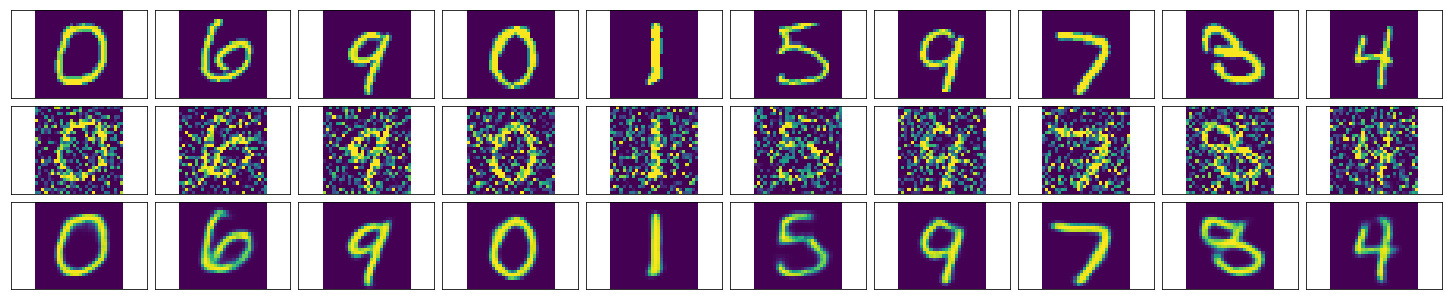

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
imgs = mnist.test.images[10:20]
noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(outputs_,
                         feed_dict={inputs_:noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([imgs, noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)